# بخش 1

## دانلود و استخراج دیتاست

In [ ]:
!pip uninstall -y bitsandbytes
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
!pip install -q wget
import os
import wget
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Markdown

plt.rcParams['font.size'] = 10

  Preparing metadata (setup.py) ... done


In [ ]:
!git clone https://github.com/TimDettmers/bitsandbytes.git
%cd bitsandbytes
!python setup.py install

Cloning into 'bitsandbytes'...
remote: Enumerating objects: 10573, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 10573 (delta 285), reused 209 (delta 190), pack-reused 10204 (from 4)
Receiving objects: 100% (10573/10573), 3.30 MiB | 7.25 MiB/s, done.
Resolving deltas: 100% (7132/7132), done.
/content/bitsandbytes
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'cmake_source_dir'
  warnings.warn(msg)
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecat

In [ ]:
!pip install --upgrade accelerate
!pip install --upgrade transformers
!pip install --upgrade peft

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.47.0.dev0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.8.1
    Uninstalling accelerate-1.8.1:
      Successfully uninstalled accelerate-1.8.1
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.47.0.dev0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.47.0.dev0-py3.11-linux-x86_64.egg is deprecated. pip

In [ ]:
dataset_url = "https://zenodo.org/api/records/10821435/files-archive"
dataset_zip = "/content/roco-dataset.zip"
dataset_dir = "/content/roco-dataset"
drive_mount_path = "/content/drive/MyDrive/rocov2"

##  پیش‌نمایش

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if not os.path.exists(os.path.join(drive_mount_path, "roco-dataset.zip")):
    print(f"در حال دانلود دیتاست از: {dataset_url}")
    wget.download(dataset_url, dataset_zip)

    os.makedirs(os.path.dirname(drive_mount_path), exist_ok=True)
    os.system(f"cp {dataset_zip} {os.path.join(drive_mount_path, 'roco-dataset.zip')}")
    print(f"فایل zip همچنین در مسیر Google Drive ذخیره شد: {drive_mount_path}")

    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

    os.remove(dataset_zip)
else:
    print("فایل دیتاست از قبل در Google Drive موجود است.")


در حال دانلود دیتاست از: https://zenodo.org/api/records/10821435/files-archive


In [ ]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

image_folder = "/content/drive/MyDrive/rocov2/train_images/train"
caption_path = "/content/drive/MyDrive/rocov2/train_captions.csv"

df = pd.read_csv(caption_path, header=None, names=["filename", "caption"])
print(f"تعداد ردیف‌ها در فایل CSV: {len(df)}")

def check_image_path(filename):
    possible_extensions = ['.jpg', '.jpeg', '.png']
    for ext in possible_extensions:
        img_path = os.path.join(image_folder, f"{filename}{ext}")
        if os.path.exists(img_path):
            return img_path
    return None

df["image_path"] = df["filename"].apply(check_image_path)
df = df[df["image_path"].notnull()].reset_index(drop=True)

تعداد ردیف‌ها در فایل CSV: 59959


In [ ]:
import os

image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.endswith('.jpg')]
print(f"تعداد تصاویر موجود در پوشه: {len(image_files)}")

تعداد تصاویر موجود در پوشه: 59958


چند نمونه از مسیر تصاویر:
0    /content/drive/MyDrive/rocov2/train_images/tra...
1    /content/drive/MyDrive/rocov2/train_images/tra...
2    /content/drive/MyDrive/rocov2/train_images/tra...
3    /content/drive/MyDrive/rocov2/train_images/tra...
4    /content/drive/MyDrive/rocov2/train_images/tra...
Name: image_path, dtype: object


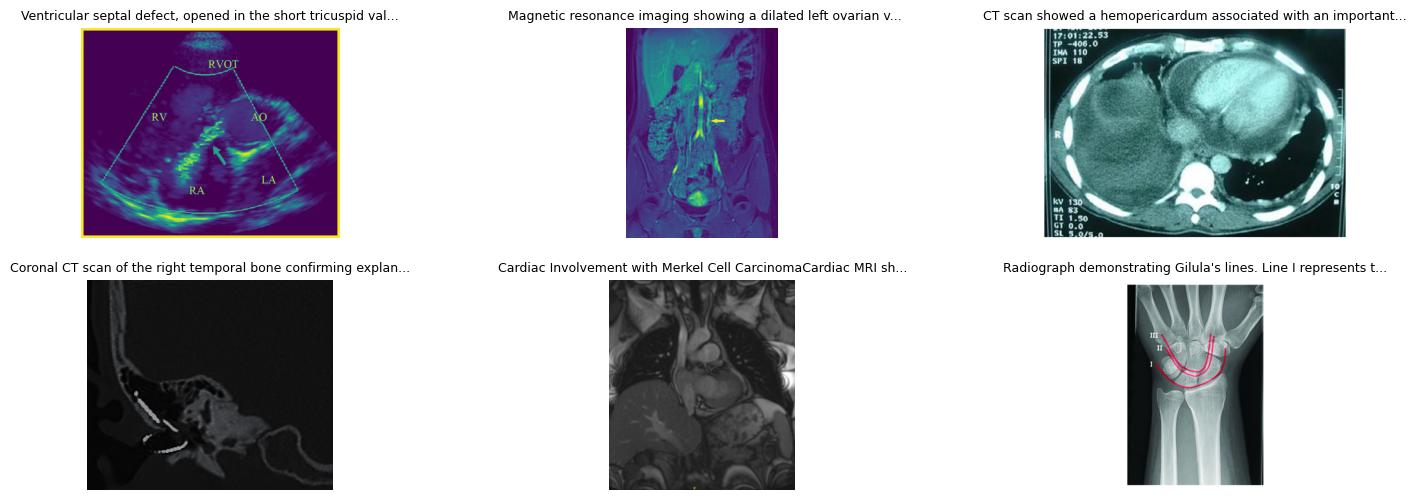

In [ ]:
print(f"چند نمونه از مسیر تصاویر:\n{df['image_path'].head()}")

sample_df = df.sample(6).reset_index(drop=True)
plt.figure(figsize=(18, 6))

for i, row in sample_df.iterrows():
    img_path = row["image_path"]
    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{row['caption'][:60]}...", fontsize=9)
    except FileNotFoundError:
        print(f"فایل تصویر یافت نشد: {img_path}")
    except Exception as e:
        print(f"خطای دیگر هنگام باز کردن تصویر {img_path}:\n{type(e).__name__}: {e}")



# بخش3

##blip2-flan-t5-xl مدل

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model
import torch
from datasets import Dataset
import pandas as pd
from PIL import Image
import os
import zipfile
from transformers import default_data_collator

In [ ]:
extract_dir = "/content/drive/MyDrive/rocov2"
caption_path = os.path.join(extract_dir, "train_captions.csv")

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from peft import LoraConfig, get_peft_model
import torch

model_name = "Salesforce/blip2-flan-t5-xl"

processor = Blip2Processor.from_pretrained(model_name, use_fast=False)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "wi", "wo"],
    lora_dropout=0.05,
    bias="none",
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

In [ ]:
import os
import pandas as pd
from PIL import Image
from datasets import Dataset

image_folder = "/content/drive/MyDrive/rocov2/train_images/train"
caption_path = "/content/drive/MyDrive/rocov2/train_captions.csv"
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.endswith('.jpg')]
print(f"تعداد تصاویر موجود: {len(image_files)}")

df = pd.read_csv(caption_path, header=None, names=["filename", "caption"])
print(f"تعداد ردیف‌ها در فایل CSV: {len(df)}")

df["image_path"] = df["filename"].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))
df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)
print(f"تعداد ردیف‌ها بعد از فیلتر کردن تصاویر موجود: {len(df)}")

dataset = Dataset.from_pandas(df[["image_path", "caption"]])

تعداد تصاویر موجود: 59958
تعداد ردیف‌ها در فایل CSV: 59959
تعداد ردیف‌ها بعد از فیلتر کردن تصاویر موجود: 59958


In [ ]:
def preprocess(example):
    try:
        image = Image.open(example["image_path"]).convert("RGB")
        prompt = "Describe the medical image in detail."

        inputs = processor(
            images=image,
            text=prompt,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=64
        )

        labels = processor.tokenizer(
            example["caption"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=64
        ).input_ids

        labels[labels == processor.tokenizer.pad_token_id] = -100
        return {
            "pixel_values": inputs["pixel_values"][0],
            "input_ids": inputs["input_ids"][0],
            "attention_mask": inputs["attention_mask"][0],
            "labels": labels[0]
        }
    except Exception as e:
        print(f"خطا در پردازش: {example['image_path']}")
        return None

dataset = Dataset.from_pandas(df[["image_path", "caption"]])

In [ ]:
def preprocess_batch(batch):
    processed_examples = []
    for i in range(len(batch['image_path'])):
        example = {
            'image_path': batch['image_path'][i],
            'caption': batch['caption'][i]
        }
        processed = preprocess(example)
        if processed is not None:
            processed_examples.append(processed)
    return {key: [d[key] for d in processed_examples] for key in processed_examples[0].keys()}


In [ ]:
processed = dataset.map(preprocess_batch, batched=True, batch_size=32)
processed = processed.remove_columns([col for col in processed.column_names if col not in ["pixel_values", "input_ids", "attention_mask", "labels"]])

# انتخاب 15000 نمونه
subset_size = min(len(processed), 15000)
subset = processed.select(range(subset_size))

Map:   0%|          | 0/59958 [00:00<?, ? examples/s]

In [ ]:
save_directory = "/content/drive/MyDrive/blip2-lora-roco-15k"
model.save_pretrained(save_directory)
processor.save_pretrained(save_directory)

['/content/drive/MyDrive/blip2-lora-roco-15k/processor_config.json']

In [ ]:
model = Blip2ForConditionalGeneration.from_pretrained(save_directory)
processor = Blip2Processor.from_pretrained(save_directory)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [ ]:
from transformers import Trainer, TrainingArguments, default_data_collator
import os

def train_blip2_on_subset(processed_dataset, num_samples, model, processor, save_path):
    if num_samples > len(processed_dataset):
        raise ValueError("num_samples exceeds dataset size.")

    subset = processed_dataset.select(range(num_samples))

    training_args = TrainingArguments(
        output_dir=save_path,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        num_train_epochs=3,
        learning_rate=5e-5,
        fp16=True,
        logging_steps=20,
        save_strategy="epoch",
        save_total_limit=1,
        remove_unused_columns=False,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=subset,
        data_collator=default_data_collator
    )

In [ ]:
!rm -rf ~/.cache/huggingface

In [ ]:
from transformers import Trainer, TrainingArguments, default_data_collator
import torch

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    learning_rate=5e-5,
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=1,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=subset,
    data_collator=default_data_collator
)

trainer.train()


In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration

save_path = "/content/drive/MyDrive/blip2-lora-roco-15k"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

print(f"مدل و پردازشگر در مسیر {save_path} ذخیره شد.")

## BLEU/METEOR/CIDEr ارزیابی

In [ ]:
!pip install -q evaluate rouge_score nltk

  Preparing metadata (setup.py) ... done


In [ ]:
import evaluate
from tqdm import tqdm
from PIL import Image
import torch
import pandas as pd
from transformers import Blip2Processor, Blip2ForConditionalGeneration

### بارگذاری مدل ذخیره‌شده

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

model_path = "/content/drive/MyDrive/blip2-lora-roco-15k"
model = Blip2ForConditionalGeneration.from_pretrained(model_path, torch_dtype=torch.float16, device_map="auto")
processor = Blip2Processor.from_pretrained(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"مدل و پردازشگر از مسیر {model_path} بارگذاری شد.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

###  dfساختن مجدد

In [ ]:
df = pd.read_csv("/content/roco-dataset/train_captions.csv", header=None, names=["filename", "caption"])
df["image_path"] = df["filename"].apply(lambda x: f"/content/roco-dataset/train_images/train/{x}.jpg")
df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)

### آماده‌سازی نمونه تست از دیتافریم

In [ ]:
test_df = df.sample(200).reset_index(drop=True)
predictions = []
references = []

model.eval()
for i in tqdm(range(len(test_df))):
    img_path = test_df.loc[i, "image_path"]
    ref_caption = test_df.loc[i, "caption"]
    try:
        image = Image.open(img_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
        generated_ids = model.generate(**inputs, max_new_tokens=30)
        generated_caption = processor.tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        predictions.append(generated_caption)
        references.append(ref_caption)
    except:
        continue

100%|██████████| 200/200 [03:01<00:00,  1.10it/s]


### محاسبه متریک‌ها

In [ ]:
bleu = evaluate.load("bleu")
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])

rouge = evaluate.load("rouge")
rouge_result = rouge.compute(predictions=predictions, references=references)

meteor = evaluate.load("meteor")
meteor_result = meteor.compute(predictions=predictions, references=references)

try:
    cider = evaluate.load("cider")
    cider_result = cider.compute(predictions=predictions, references=[[ref] for ref in references])
except:
    cider_result = {"CIDEr": "not available"}

print("\n نتایج ارزیابی مدل BLIP-2:")
print(f"BLEU: {bleu_result['bleu']:.4f}")
print(f"ROUGE-L: {rouge_result['rougeL']:.4f}")
print(f"METEOR: {meteor_result['meteor']:.4f}")
print(f"CIDEr: {cider_result.get('CIDEr', 'N/A')}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



 نتایج ارزیابی مدل BLIP-2:
BLEU: 0.0036
ROUGE-L: 0.1448
METEOR: 0.0765
CIDEr: not available
